In [1]:
import numpy as np
import glob
import os

from matplotlib import colors as mcolors
from matplotlib.patches import Ellipse
from mpld3 import plugins, utils
%matplotlib notebook
import mpld3

mpld3.enable_notebook()

import pandas as pd
# change csv filename here
dfin = pd.read_csv('fake.csv',index_col=0)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
from numpy import random as rnd
from PlotPatchHelper import ReadImg
avg0s = dfin['x0'] 
avg1s = dfin['x1']
#avg2s = dfin['x2']
sig0s = dfin['sig0']
sig1s = dfin['sig1']
#sig2s = dfin['sig2']
colors = [rnd.rand(3) for i in range(len(dfin))]
label_names=dfin.label.tolist()

rootdir = './images'
filenames = ["%s/%s.jpg" % (rootdir, label_names[i]) for i in range(len(dfin))]

<IPython.core.display.Javascript object>


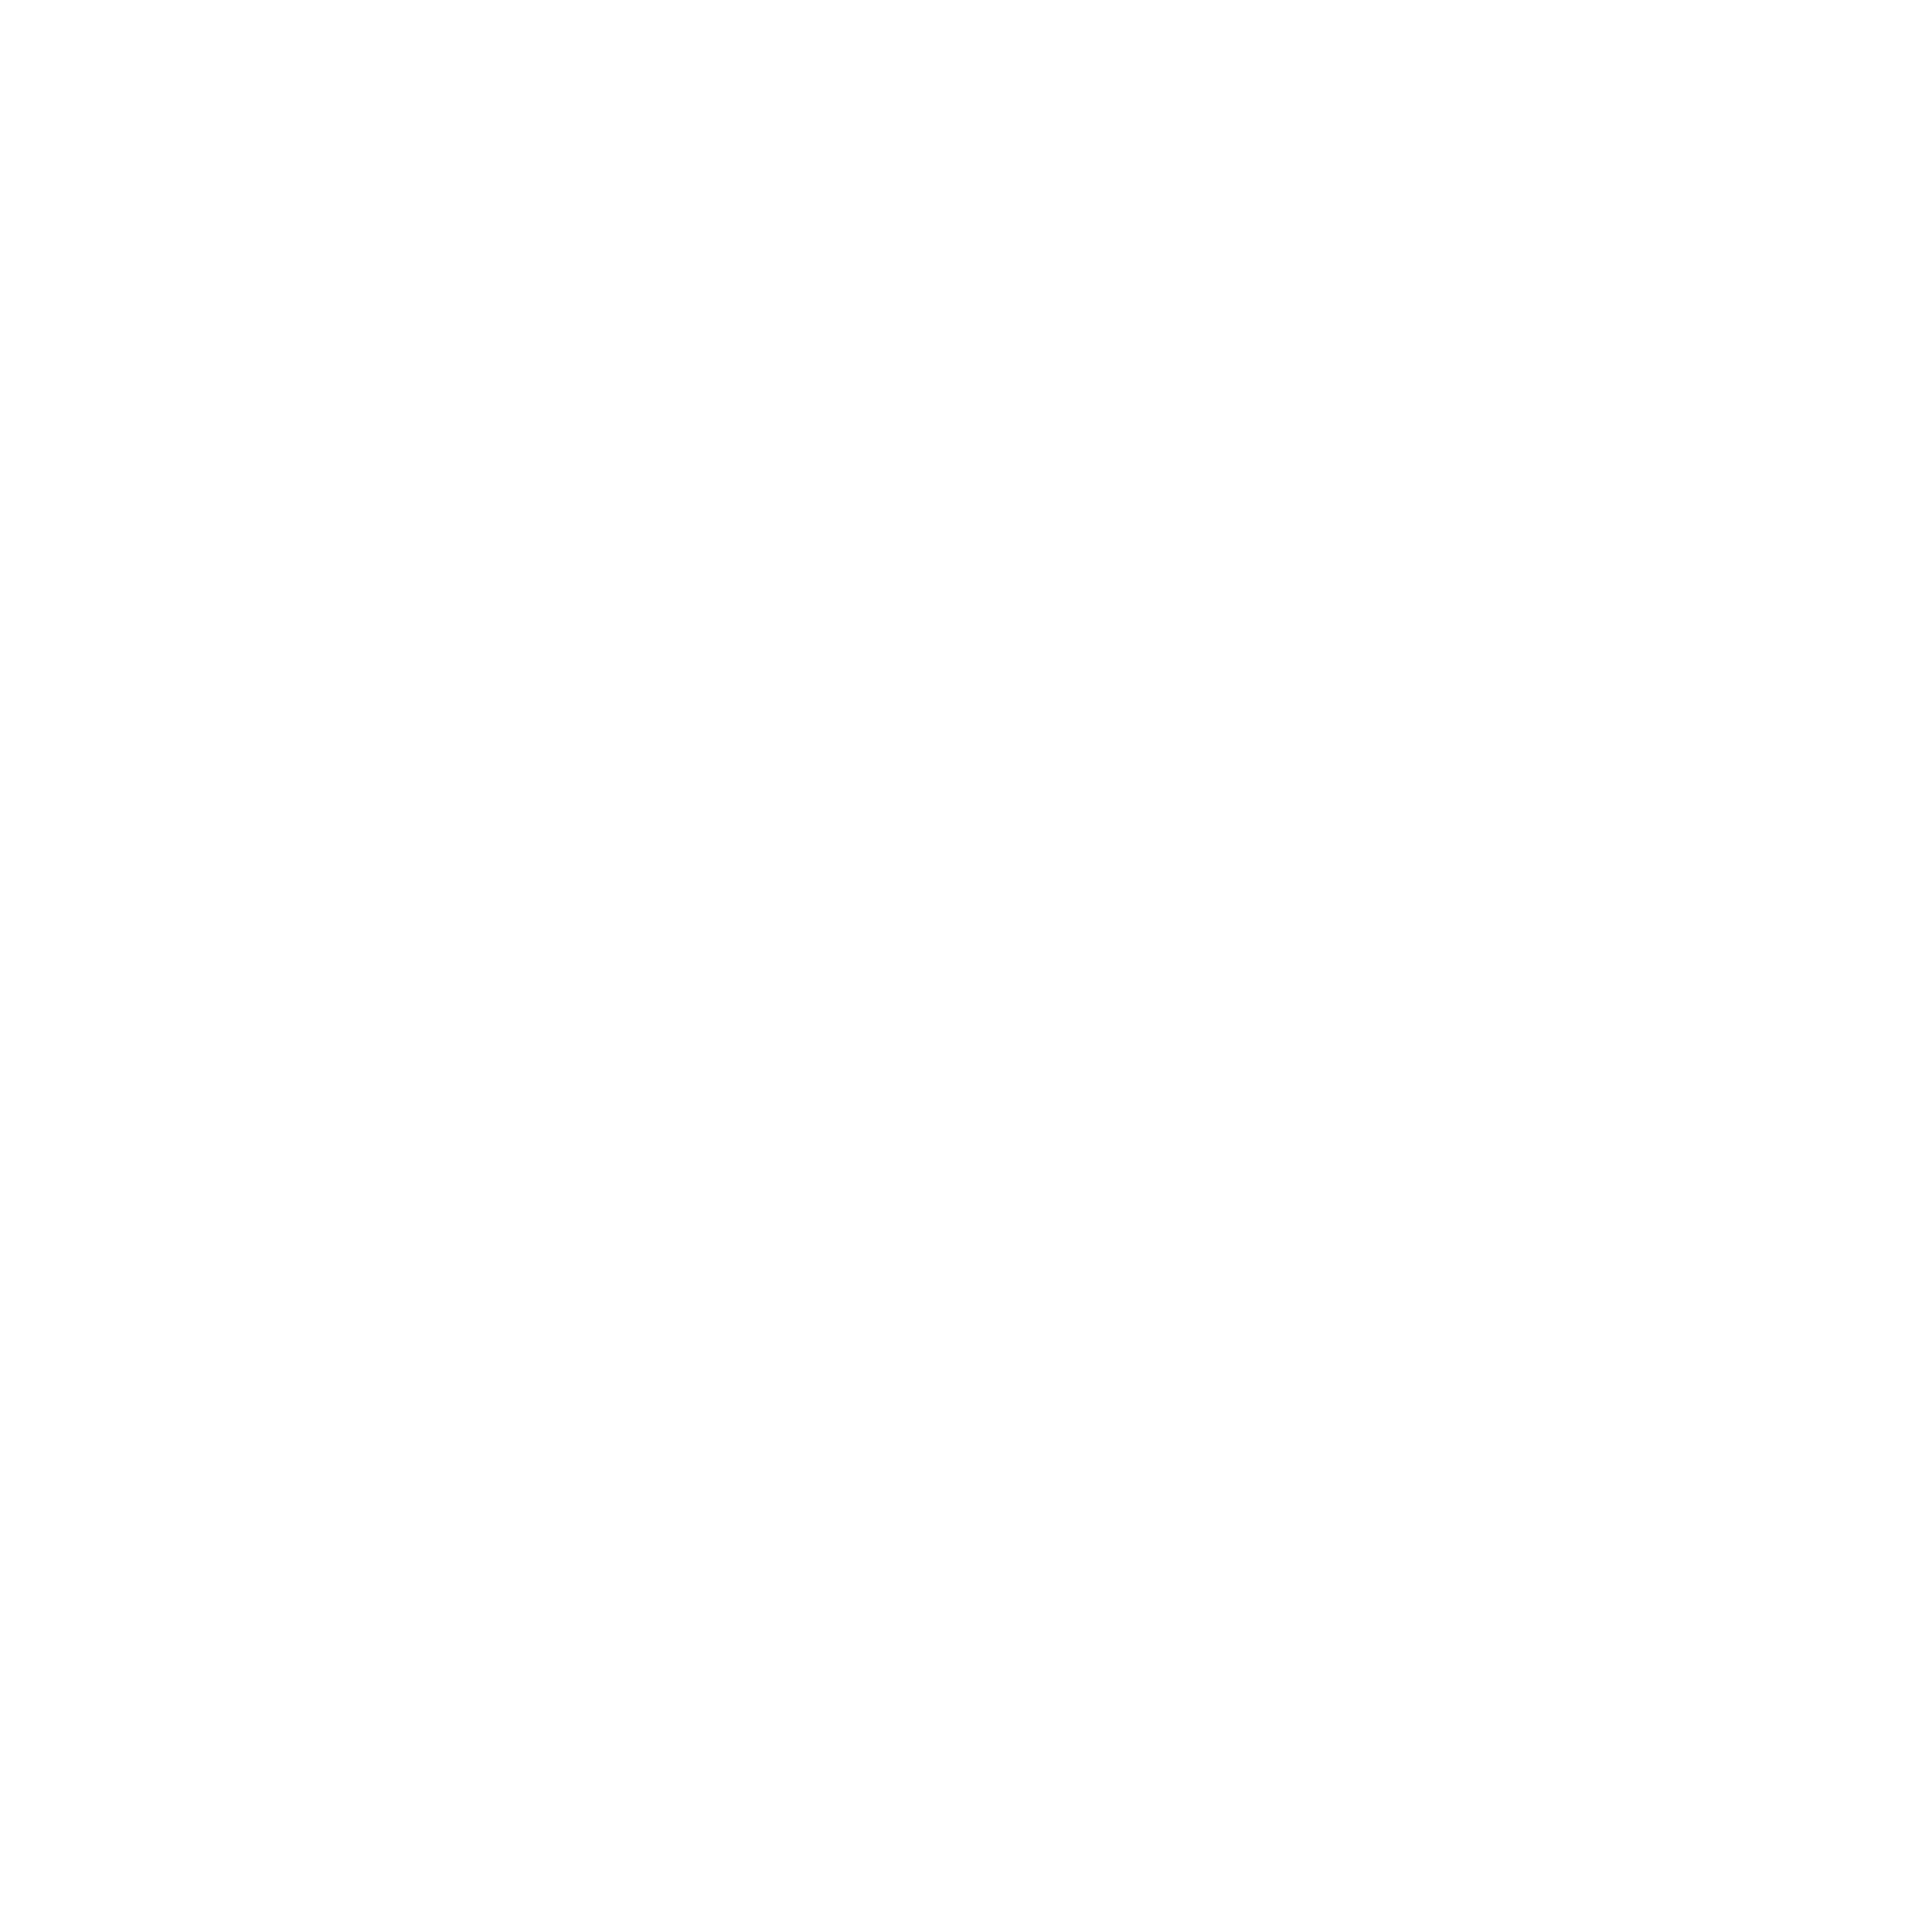

In [4]:
from matplotlib.collections import PatchCollection
fig =plt.figure(figsize=(10,10),dpi=400)
ax = fig.add_subplot(111,aspect='equal')
avg0s = dfin['x0'] 
avg1s = dfin['x1']
sig0s = dfin['sig0']
sig1s = dfin['sig1']
colors = [rnd.rand(3) for i in range(len(dfin))]



patches = []
for i in range(len(dfin)):
    avg0 = avg0s[i]
    avg1 = avg1s[i]
    sig0 = sig0s[i]
    sig1 = sig1s[i]
    e = Ellipse(np.array([avg0, avg1]), width=sig0*2, height=sig1*2)
    e.set_clip_box(ax.bbox)
    e.set_facecolor(colors[i])
    e.set_alpha(0.5)
    #ax.add_patch(e)
    patches.append(e)
    dx = rnd.rand()/10+0.1
    dy = rnd.rand()/10+0.1
    ax.annotate(label_names[i],(avg0+dx,avg1+dy),fontsize=2,color=colors[i])

# add all patches to patch collection
patch_colection = PatchCollection(patches, match_original=True)
ax.add_collection(patch_colection)
ax.set_xlim(-15,15)
ax.set_ylim(-20,20)
plt.tight_layout()
plt.savefig('scene_ellipse.png')

linkImg0 = ReadImg(patch_colection, filenames)
plugins.connect(fig, linkImg0)
mpld3.save_html(fig, "scene_ellipse.html")
mpld3.display()

In [ ]:
selectedfiles = [filenames[i] for i in selected]
selectedfiles